<a href="https://colab.research.google.com/github/rajkumar2004725/fake_news_detection/blob/main/fake_news_detection_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade numpy
!pip install --upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 95.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download clmentbisaillon/fake-and-real-news-dataset

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/fake-and-real-news-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import pandas as pd


true_df = pd.read_csv("/content/True.csv")
fake_df = pd.read_csv("/content/Fake.csv")


true_df["label"] = 1
fake_df["label"] = 0


df = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)


df = df.sample(frac=1, random_state=42).reset_index(drop=True)


print(df.head())
print("value_counts")
print(df["label"].value_counts())


                                               title  \
0   BREAKING: GOP Chairman Grassley Has Had Enoug...   
1   Failed GOP Candidates Remembered In Hilarious...   
2   Mike Pence’s New DC Neighbors Are HILARIOUSLY...   
3  California AG pledges to defend birth control ...   
4  AZ RANCHERS Living On US-Mexico Border Destroy...   

                                                text       subject  \
0  Donald Trump s White House is in chaos, and th...          News   
1  Now that Donald Trump is the presumptive GOP n...          News   
2  Mike Pence is a huge homophobe. He supports ex...          News   
3  SAN FRANCISCO (Reuters) - California Attorney ...  politicsNews   
4  Twisted reasoning is all that comes from Pelos...      politics   

               date  label  
0     July 21, 2017      0  
1       May 7, 2016      0  
2  December 3, 2016      0  
3  October 6, 2017       1  
4      Apr 25, 2017      0  
value_counts
label
0    23481
1    21417
Name: count, dtype: int64


In [5]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
df = df.drop(columns=['subject', 'date'])

In [8]:
df.head(5)

,title,text,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,0


In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['text'] = df['text'].apply(clean_text)


print(df.head())


                                               title  \
0   BREAKING: GOP Chairman Grassley Has Had Enoug...   
1   Failed GOP Candidates Remembered In Hilarious...   
2   Mike Pence’s New DC Neighbors Are HILARIOUSLY...   
3  California AG pledges to defend birth control ...   
4  AZ RANCHERS Living On US-Mexico Border Destroy...   

                                                text  label  
0  donald trump white house chaos trying cover ru...      0  
1  donald trump presumptive gop nominee time reme...      0  
2  mike penny huge homophobe support ex gay conve...      0  
3  san francisco reuters california attorney gene...      1  
4  twisted reasoning come pelosi day especially 2...      0  


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["text"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("TF-IDF Vectorization Completed! ")
print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

TF-IDF Vectorization Completed! 
Train Shape: (35918, 5000), Test Shape: (8980, 5000)


In [15]:
X_train[0].shape

(1, 5000)

In [14]:
for i in X_train[0]:
  print(i)

  (0, 4659)	0.2136570251152401
  (0, 4664)	0.07392325797749014
  (0, 4528)	0.06190952745232139
  (0, 4016)	0.04414250379696827
  (0, 2624)	0.04382668229463813
  (0, 4678)	0.30526592518783113
  (0, 288)	0.021366464566033094
  (0, 2732)	0.03500421106887309
  (0, 1654)	0.026755269236082693
  (0, 3156)	0.04035066355260434
  (0, 1780)	0.03072216832904129
  (0, 2268)	0.05688011229467303
  (0, 4797)	0.026713260478311282
  (0, 1989)	0.03873988177856846
  (0, 2101)	0.03974844761942761
  (0, 4683)	0.12810889020674704
  (0, 3386)	0.03431240347181462
  (0, 3309)	0.02096344879041942
  (0, 3953)	0.047539297192944314
  (0, 3459)	0.03730696992869634
  (0, 4566)	0.03689940400334931
  (0, 586)	0.04025625816663215
  (0, 1663)	0.04339200045517076
  (0, 1274)	0.05849174421515733
  (0, 175)	0.03506499079765865
  :	:
  (0, 4705)	0.06231442157802342
  (0, 3607)	0.05592376573716054
  (0, 4662)	0.04648844394016057
  (0, 3011)	0.05663114884739864
  (0, 724)	0.062203612872265036
  (0, 4393)	0.057385434771871725
 

<ipython-input-13-c81bcde51dd1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette="viridis")


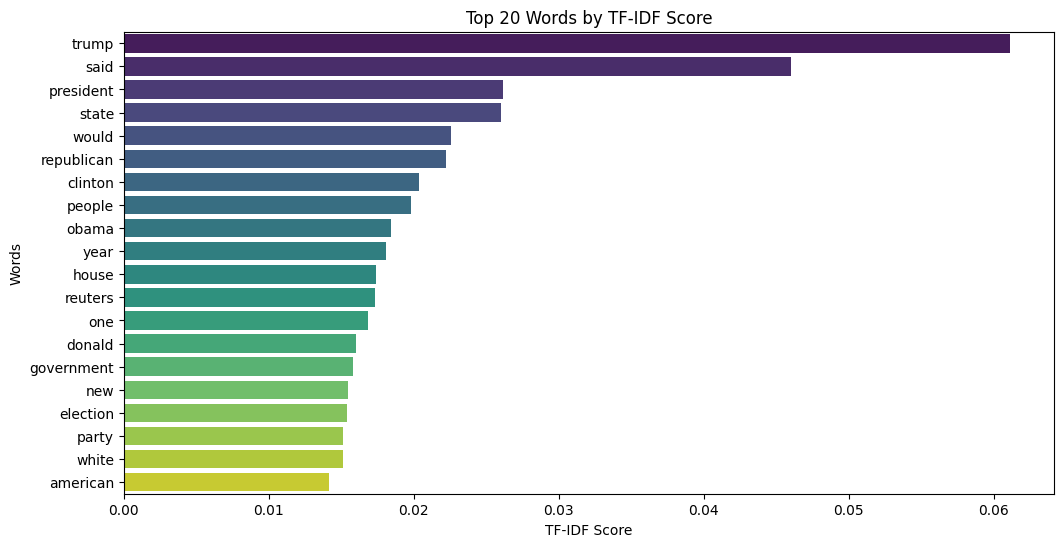

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# Get feature names from TF-IDF
feature_names = vectorizer.get_feature_names_out()

# Compute average TF-IDF values for each word
mean_tfidf = np.asarray(X.mean(axis=0)).flatten()

# Sort by importance
sorted_indices = np.argsort(mean_tfidf)[::-1][:20]  # Top 20 features
top_words = [feature_names[i] for i in sorted_indices]
top_scores = mean_tfidf[sorted_indices]

#  Plot Top 20 Words by TF-IDF Score
plt.figure(figsize=(12, 6))
sns.barplot(x=top_scores, y=top_words, palette="viridis")
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.title("Top 20 Words by TF-IDF Score")
plt.show()



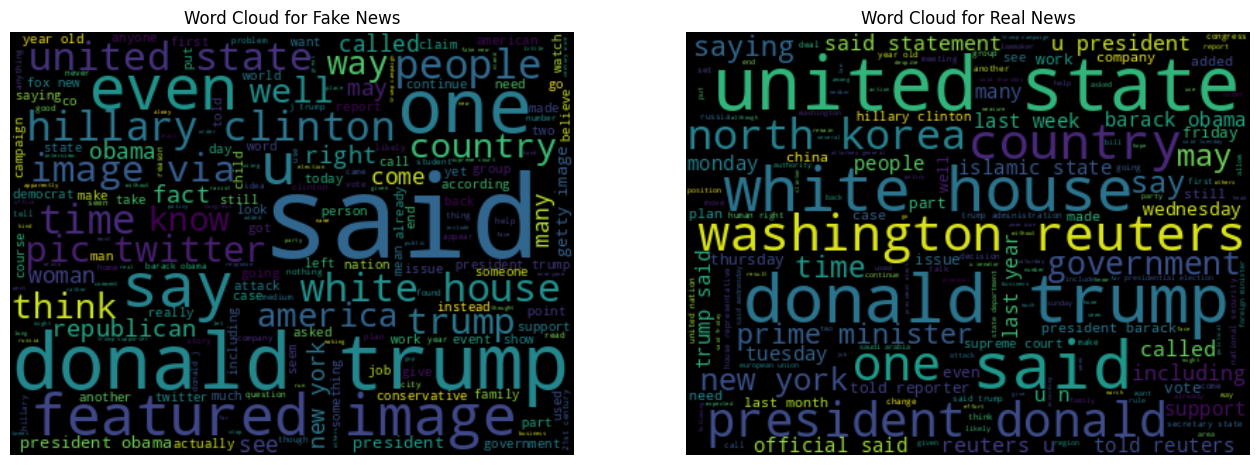

In [16]:
# Word Clouds for Fake vs. Real News
fake_text = " ".join(df[df['label'] == 0]['text'])
real_text = " ".join(df[df['label'] == 1]['text'])

plt.figure(figsize=(16, 6))

# Fake news WordCloud
plt.subplot(1, 2, 1)
wordcloud_fake = WordCloud(width=400, height=300, background_color='black').generate(fake_text)
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Fake News")

# Real news WordCloud
plt.subplot(1, 2, 2)
wordcloud_real = WordCloud(width=400, height=300, background_color='black').generate(real_text)
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Real News")

plt.show()


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [18]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [19]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [20]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    return accuracy,precision_score(y_test,y_pred)

In [21]:
clfs.items()

dict_items([('SVC', SVC(gamma=1.0, kernel='sigmoid')), ('KN', KNeighborsClassifier()), ('NB', MultinomialNB()), ('DT', DecisionTreeClassifier(max_depth=5)), ('LR', LogisticRegression(penalty='l1', solver='liblinear')), ('RF', RandomForestClassifier(n_estimators=50, random_state=2)), ('AdaBoost', AdaBoostClassifier(random_state=2)), ('BgC', BaggingClassifier(n_estimators=50, random_state=2)), ('ETC', ExtraTreesClassifier(n_estimators=50, random_state=2)), ('GBDT', GradientBoostingClassifier(n_estimators=50, random_state=2)), ('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, ma

In [22]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9919821826280624
Precision -  0.9891530117701361
For  KN
Accuracy -  0.7083518930957684
Precision -  0.9040114613180515
For  NB
Accuracy -  0.929510022271715
Precision -  0.9298737727910238
For  DT
Accuracy -  0.9937639198218263
Precision -  0.9907727797001153
For  LR
Accuracy -  0.9923162583518931
Precision -  0.989160516605166
For  RF
Accuracy -  0.9961024498886414
Precision -  0.9962859795728877
For  AdaBoost
Accuracy -  0.9930957683741648
Precision -  0.9878300803673938
For  BgC
Accuracy -  0.9963251670378619
Precision -  0.9967487227124942
For  ETC
Accuracy -  0.9904231625835189
Precision -  0.9868633325651072
For  GBDT
Accuracy -  0.9942093541202672
Precision -  0.990329265484688
For  xgb
Accuracy -  0.9973273942093541
Precision -  0.996295438758972


In [23]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [24]:
performance_df

,Algorithm,Accuracy,Precision
7,BgC,0.996325,0.996749
10,xgb,0.997327,0.996295
5,RF,0.996102,0.996286
3,DT,0.993764,0.990773
9,GBDT,0.994209,0.990329
4,LR,0.992316,0.989161
0,SVC,0.991982,0.989153
6,AdaBoost,0.993096,0.987830
8,ETC,0.990423,0.986863
2,NB,0.929510,0.929874


USING WORD2VEC EMBEDDINGS


In [25]:
import gensim
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


df['tokenized_text'] = df['text'].apply(lambda x: x.split())

# Train Word2Vec model
w2v_model = Word2Vec(sentences=df['tokenized_text'], vector_size=100, window=5, min_count=5, workers=4)

# Extract vocabulary
words = list(w2v_model.wv.index_to_key)

# Get embeddings
word_vectors = np.array([w2v_model.wv[word] for word in words])


In [34]:
for i, j in zip(words[:10], word_vectors[:10]):
    print(i, '||', j)

trump || [ 1.8869554   0.8512429  -1.6555514   1.7761763  -1.217668   -0.60783124
  2.957835    1.6838051   1.6429077   0.56118864  0.8435289   0.6970226
  0.5393538  -1.6736206   0.22906734  0.8744213   0.89555043  0.7317398
 -0.07207899  0.5352658   1.0541033  -0.62500733  1.0353363   1.1726159
  1.9842739  -0.6168827   0.88137186  1.461934    3.2790372  -2.571539
 -1.43122    -1.0146315  -0.98882395  0.20278822 -0.06847117 -0.0130251
  1.7065634   1.572946    1.4704919   1.0154681  -0.0117048   1.2972426
 -1.3753945   1.3516393  -2.321535   -0.9385341  -2.379604    1.9383829
  2.8798468   1.8116633  -2.2991583   1.6854192   1.6129202   0.74727136
  2.0230303  -0.39064923  0.6656344  -1.2487274   0.79411584  2.1042054
  1.0664133  -1.2324265  -0.5898507  -2.9346974   0.52409613  2.381903
  1.4128298  -2.425637    1.4631842  -1.1703755   0.9356553  -0.26778305
 -0.81127685 -1.2425449  -0.8232265   0.09475484  3.2517667  -0.6963796
  0.6081334  -1.0079184   0.4212086   1.0543298   2.65

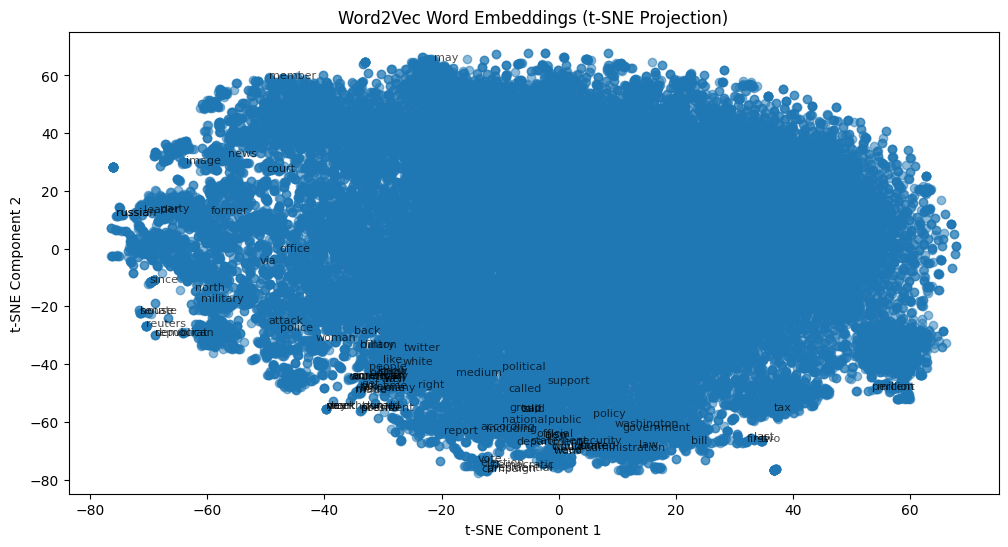

In [27]:
# Reduce dimensions using PCA
pca = PCA(n_components=50)  # Reduce to 50D before t-SNE
word_vectors_pca = pca.fit_transform(word_vectors)

# Further reduce dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors_pca)

plt.figure(figsize=(12, 6))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], alpha=0.5)
for i, word in enumerate(words[:100]):  # Annotate only first 100 words
    plt.annotate(word, (word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), fontsize=8, alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Word2Vec Word Embeddings (t-SNE Projection)")
plt.show()


In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def get_sentence_embedding(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # If no words in vocab, return zero vector


df['embedding'] = df['tokenized_text'].apply(lambda x: get_sentence_embedding(" ".join(x), w2v_model))

X = np.vstack(df['embedding'].values)
y = y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.9691536748329621
Random Forest Accuracy: 0.967260579064588

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      4669
           1       0.97      0.96      0.97      4311

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980

